In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage
#from matplotlib.colors import TwoSlopeNorm

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_EnBarrier/Data/'


39.33879383370099


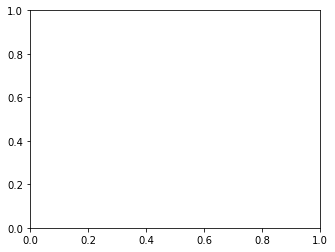

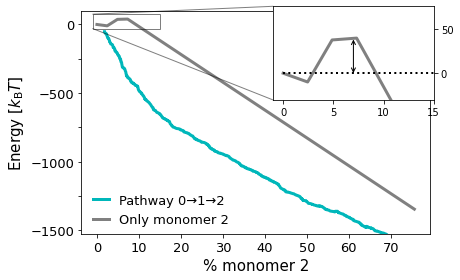

In [3]:
##### FILTERED

N=42
loc = datadir #+'Energies/'
namedat = 'smolspaceTest1_'
EList = pandas.read_csv(loc + namedat +"03subs_100_300.txt", sep=' ', header = None, skiprows = 1)#[0]
BendingTotal = pandas.read_csv(loc + namedat +"Ebend.txt", header = None, sep=' ')[0]
MembraneTotal = pandas.read_csv(loc + namedat +"Emem.txt", header = None, sep=' ')[0]
P0= pandas.read_csv(loc + namedat +"Prob0.txt", header = None, sep=' ')[0]
P1= pandas.read_csv(loc + namedat +"Prob1.txt", header = None, sep=' ')[0]
P2 = pandas.read_csv(loc + namedat +"Prob2.txt", header = None, sep=' ')[0]

Earr_ = EList.values.reshape(N,N)
Earr = (Earr_.T)
bind0 = -0.8
bind1 = bind0*3.2
bind2 = -0.8*12

fig,ax = plt.subplots(figsize = (5.2,4))
fig,ax = plt.subplots(figsize = (6.5,4)) ##Thesis!

x = np.arange(0,N-10,1)*(100/(N-1))
y = (P1*(bind1) + P0*(bind0) + P2*(bind2) + BendingTotal/2 + MembraneTotal)*(20/2.5)

filterwindow=100
y=scipy.ndimage.median_filter(y, size=filterwindow)
P2fil=(P2.values[::1]*100/N)
P2fil=scipy.ndimage.median_filter(P2fil, size=filterwindow)

colors=['gray','#00b7ba']
ax.plot(P2fil[0:5000], y[0:5000], label = "Pathway 0→1→2", color = colors[1], linewidth = 3, )
ax.plot(x,Earr[0,:N-10]*(20/2.5), label = "Only monomer 2", color = colors[0],linewidth = 3)
#y[0]=0
#ax.plot(P2fil[0:5000], y[0:5000], label = "Actual pathway 0→1→2", color = colors[1], linewidth = 3, )

plt.xticks(fontsize=13)
plt.yticks([i*(-250) for i in range(0,8)],fontsize=13)
n = 2
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]

# inset axes....
axins = ax.inset_axes([0.55, 0.6, 0.46, 0.42])
Z2= Earr[0,0:10]*(20/2.5)
Z3 = y[0:500] #((P1*(bind1) + P0*(bind0) + P2*(bind2) + BendingTotal/2 + MembraneTotal)*10*(70/90))[10:500]

x3 = (P2*100/N)[0:500]
z4= np.zeros(10)
x2 = np.arange(0,10,1)*(100/(N-1))
axins.plot(x2,Z2, color = colors[0],linewidth = 3 )
axins.plot(x3,Z3, color = colors[1],linewidth = 3 )
axins.plot(x2,z4, ':', color = "black", linewidth = 2)

axins.yaxis.tick_right()
# sub region of the original image
x1, x2, y1, y2 = -1, 15, -30, 75
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_xticklabels('')
#axins.set_xticks([])
#axins.set_yticklabels('')
#axins.set_yticks([0],["0"])
#axins.set_yticklabels(["0"]fontsize=13)
axins.annotate(text='', xy=(7,-2), xytext=(7,40), arrowprops=dict(arrowstyle='<->'))
y1, y2 = 150, -1600
ax.set_ylim(y2, y1)
ax.indicate_inset_zoom(axins, edgecolor="black",label='_nolegend_')

n = 1
#[l.set_visible(False) for (i,l) in enumerate(axins.yaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(axins.yaxis.get_ticklabels()) if i==0]

#plt.gcf().subplots_adjust(right=0.85)

ax.set_ylabel("Energy [$k_\mathrm{B}T$]", fontsize = 15)
ax.set_xlabel("% monomer 2", fontsize = 15)
ax.legend(loc = (0.02,0.01), fontsize = 13, frameon=False, handlelength=1.2)
print(np.max(Earr[0,:N-10]*(20/2.5)))
ax.set_ylim([-1525,100])
plt.tight_layout()
fname  = 'BarrierLinePlot.pdf'
fig.savefig('Plots/'+fname)
